#random


In [ ]:
seed = 666
# python RNG
import random
random.seed(seed)
# pytorch RNGs
import torch
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
if torch.cuda.is_available(): torch.cuda.manual_seed_all(seed)
# numpy RNG
import numpy as np
np.random.seed(seed)

#dataset 0 task2 

In [ ]:
!git clone https://github.com/zae-bayern/elpv-dataset

Cloning into 'elpv-dataset'...
remote: Enumerating objects: 2686, done.
remote: Total 2686 (delta 0), reused 0 (delta 0), pack-reused 2686
Receiving objects: 100% (2686/2686), 90.79 MiB | 33.13 MiB/s, done.
Resolving deltas: 100% (30/30), done.


In [ ]:
dataset_id=0
dataset_name="cells_eng"

In [ ]:
import os
os.makedirs("/content/Task_Training_Input"+str(dataset_id), exist_ok=True)

In [ ]:
import math
import pandas as pd
import numpy as np
import shutil
df = pd.read_csv("/content/elpv-dataset/labels.csv",delim_whitespace=True ,names=["image","prob","type"])
li=[]
for i in list(df["image"]):
  word=i.split("/")[1]
  li.append(word.split(".")[0])
df["image"]=li
#print(df)
classes=[]
for index, row in df.iterrows():
  shutil.copy2("/content/elpv-dataset/images/"+row["image"]+".png", "/content/Task_Training_Input"+str(dataset_id)+"/")
  c=0
  if row["prob"]== 0.0 :
    c=0
  elif row["prob"]== 0.3333333333333333 :
    c=1  
  elif row["prob"]== 0.6666666666666666 :  
    c=2
  elif row["prob"]== 1.0 :      
    c=3
  #if row["type"]== "mono":
    #c+=4
  classes.append(c)
df["class"]=classes
df=df[["image","class"]]

from sklearn.utils import shuffle
df = shuffle(df,random_state=666)
df

,image,class
909,cell0910,0
1591,cell1592,0
540,cell0541,0
1747,cell1748,1
2482,cell2483,1
...,...,...
1993,cell1994,0
70,cell0071,0
1950,cell1951,0
1922,cell1923,2


In [ ]:
li = list(df["class"].values)
my_dict = {i:li.count(i) for i in li}
my_dict

{0: 1508, 1: 295, 2: 106, 3: 715}

In [ ]:
from sklearn.model_selection import train_test_split
train_df_cell_all, test_df_cell_all = train_test_split(df, test_size=0.2,random_state=42, stratify= df["class"])
df_cell_all=pd.DataFrame(df)
df_new=train_df_cell_all 

In [ ]:
train_df, test_df = train_test_split(df_new, test_size=0.2,random_state=42, stratify= df_new["class"])

In [ ]:
my_dict[0]

1508

In [ ]:
#f = lambda x: x-4 if x>3 else x
#test_df_cell_all['class'] = test_df_cell_all['class'].map(f)
#test_df['class'] = test_df['class'].map(f)
#train_df['class'] = train_df['class'].map(f)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
li = list(train_df["class"].values)
my_dict = {i:li.count(i) for i in li}
my_dict

{0: 965, 1: 189, 2: 68, 3: 457}

#4 classses


In [ ]:
X_train_=[]
Y_train_=[]
def repeat_img(name,classes,repeat):
  for i in range(repeat):
    image = Image.open('/content/elpv-dataset/images/'+name+'.png') 
    image = image.resize((224,224))
    numpydata = list(asarray(image)) 
    X_train_.append(numpydata)
    Y_train_.append(classes)



In [ ]:
from PIL import Image 
from numpy import asarray 
import numpy as np

counter=0
for index, row in train_df.iterrows():
  rep=1
  if row["class"]==1:
    rep=5
  elif row["class"]==2:
    rep=12 
  elif row["class"]==3:
    rep=2    
  repeat_img(row["image"],row["class"],rep)
  #image = Image.open('/content/elpv-dataset/images/'+row["image"]+'.png') 
  #image = image.resize((224,224))
  #numpydata = list(asarray(image)) 
  #X_train_.append(numpydata)
  #Y_train_.append(row["class"])
  counter+=1
  if counter %100==0:
    print(counter)
X_train_=np.array(X_train_)
Y_train_=np.array(Y_train_)
def load_data_():
  return X_train_ ,Y_train_

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600


In [ ]:
list(Y_train_).count(0)

965

In [ ]:
print((X_train_).shape)
print((Y_train_).shape)

(3640, 224, 224)
(3640,)


#8 classses


In [ ]:
X_train_=[]
Y_train_=[]
def repeat_img(name,classes,repeat):
  for i in range(repeat):
    image = Image.open('/content/elpv-dataset/images/'+name+'.png') 
    image = image.resize((224,224))
    numpydata = list(asarray(image)) 
    X_train_.append(numpydata)
    Y_train_.append(classes)



In [ ]:
import numpy as np
for index, row in train_df.iterrows():
  rep=np.ceil(my_dict[0]/my_dict[row["class"]])
  print(rep,row["class"])

In [ ]:
from PIL import Image 
from numpy import asarray 
import numpy as np

counter=0
for index, row in train_df.iterrows():
  rep=int(np.ceil(my_dict[0]/my_dict[row["class"]]))

  repeat_img(row["image"],row["class"],rep)
  #image = Image.open('/content/elpv-dataset/images/'+row["image"]+'.png') 
  #image = image.resize((224,224))
  #numpydata = list(asarray(image)) 
  #X_train_.append(numpydata)
  #Y_train_.append(row["class"])
  counter+=1
  if counter %100==0:
    print(counter)
X_train_=np.array(X_train_)
Y_train_=np.array(Y_train_)
def load_data_():
  return X_train_ ,Y_train_

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600


In [ ]:
list(Y_train_).count(0)

589

In [ ]:
print((X_train_).shape)
print((Y_train_).shape)

(5216, 224, 224)
(5216,)


#shuffle

In [ ]:
import sklearn
X_train_, Y_train_ = sklearn.utils.shuffle(X_train_, Y_train_)

#GAN MODEL

In [ ]:
# example of training an conditional gan on the fashion mnist dataset
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
#from keras.datasets.fashion_mnist import load_data
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers import Concatenate

# define the standalone discriminator model
def define_discriminator(in_shape=(224,224,1), n_classes=8):
	# label input
	in_label = Input(shape=(1,))
	# embedding for categorical input
	li = Embedding(n_classes, 50)(in_label)
	# scale up to image dimensions with linear activation
	n_nodes = in_shape[0] * in_shape[1]
	li = Dense(n_nodes)(li)
	# reshape to additional channel
	li = Reshape((in_shape[0], in_shape[1], 1))(li)
	# image input
	in_image = Input(shape=in_shape)
	# concat label as a channel
	merge = Concatenate()([in_image, li])
	# downsample
	fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(merge)
	fe = LeakyReLU(alpha=0.2)(fe)
	# downsample
	fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(fe)
	fe = LeakyReLU(alpha=0.2)(fe)
# downsample
	fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(fe)
	fe = LeakyReLU(alpha=0.2)(fe)
# downsample
	fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(fe)
	fe = LeakyReLU(alpha=0.2)(fe) 
	# flatten feature maps
	fe = Flatten()(fe)
	# dropout
	fe = Dropout(0.4)(fe)
	# output
	out_layer = Dense(1, activation='sigmoid')(fe)
	# define model
	model = Model([in_image, in_label], out_layer)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

# define the standalone generator model
def define_generator(latent_dim, n_classes=8):
	# label input
	in_=14
	in_label = Input(shape=(1,))
	# embedding for categorical input
	li = Embedding(n_classes, 50)(in_label)
	# linear multiplication
	n_nodes = in_ * in_
	li = Dense(n_nodes)(li)
	# reshape to additional channel
	li = Reshape((in_, in_, 1))(li)
	# image generator input
	in_lat = Input(shape=(latent_dim,))
	# foundation for 7x7 image
	n_nodes = 128 * in_ * in_
	gen = Dense(n_nodes)(in_lat)
	gen = LeakyReLU(alpha=0.2)(gen)
	gen = Reshape((in_, in_, 128))(gen)
	# merge image gen and label input
	merge = Concatenate()([gen, li])
	# upsample to 14x14
	gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(merge)
	gen = LeakyReLU(alpha=0.2)(gen)
	# upsample to 28x28
	gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(gen)
	gen = LeakyReLU(alpha=0.2)(gen)
# upsample to 28x28
	gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(gen)
	gen = LeakyReLU(alpha=0.2)(gen) 
# upsample to 28x28
	gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(gen)
	gen = LeakyReLU(alpha=0.2)(gen)  
	# output
	out_layer = Conv2D(1, (7,7), activation='tanh', padding='same')(gen)
	# define model
	model = Model([in_lat, in_label], out_layer)
	return model

# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# get noise and label inputs from generator model
	gen_noise, gen_label = g_model.input
	# get image output from the generator model
	gen_output = g_model.output;print(gen_output)
	# connect image output and label input from generator as inputs to discriminator
  
	gan_output = d_model([gen_output, gen_label])
	# define gan model as taking noise and label and outputting a classification
	model = Model([gen_noise, gen_label], gan_output)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

# load fashion mnist images
def load_real_samples():
	# load dataset
	(trainX, trainy)= load_data_()
	# expand to 3d, e.g. add channels
	X = expand_dims(trainX, axis=-1)
	# convert from ints to floats
	X = X.astype('float32')
	# scale from [0,255] to [-1,1]
	X = (X - 127.5) / 127.5
	return [X, trainy]

# # select real samples
def generate_real_samples(dataset, n_samples):
	# split into images and labels
	images, labels = dataset
	# choose random instances
	ix = randint(0, images.shape[0], n_samples)
	# select images and labels
	X, labels = images[ix], labels[ix]
	# generate class labels
	y = ones((n_samples, 1))
	return [X, labels], y

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples, n_classes=8):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	z_input = x_input.reshape(n_samples, latent_dim)
	# generate labels
	labels = randint(0, n_classes, n_samples)
	return [z_input, labels]

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
	# generate points in latent space
	z_input, labels_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	images = generator.predict([z_input, labels_input])
	# create class labels
	y = zeros((n_samples, 1))
	return [images, labels_input], y

# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=32):
	bat_per_epo = int(dataset[0].shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	best=999 
	# manually enumerate epochs
	for i in range(n_epochs):
		loss=0
		loss_g=0
		loss_d=0
		new_b=0
		# enumerate batches over the training set
		for j in range(bat_per_epo):
			# get randomly selected 'real' samples
			[X_real, labels_real], y_real = generate_real_samples(dataset, half_batch)
			# update discriminator model weights
			d_loss1, _ = d_model.train_on_batch([X_real, labels_real], y_real)
			# generate 'fake' examples
			[X_fake, labels], y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# update discriminator model weights
			d_loss2, _ = d_model.train_on_batch([X_fake, labels], y_fake)
			# prepare points in latent space as input for the generator
			[z_input, labels_input] = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
			y_gan = ones((n_batch, 1))
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch([z_input, labels_input], y_gan)
			loss_g += g_loss
			loss_d += (d_loss1+d_loss2)/2
			new_b=loss_g+loss_d
			# summarize loss on this batch
		print('>%d,%d, d1=%.3f, g=%.3f' %
				(i+1, bat_per_epo, loss_d, loss_g))
		if new_b<best:
			g_model.save('cgan_generator_'+str(new_b)+'_.h5')
			best=new_b
			print("saved")
def train1(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=32):
	bat_per_epo = int(dataset[0].shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	best=999 
	# manually enumerate epochs
	for i in range(n_epochs):
		loss=0
		loss_g=0
		loss_d=0
		new_b=0
		new_acc1=0
		new_acc2=0        
		# enumerate batches over the training set
		for j in range(bat_per_epo):
			# get randomly selected 'real' samples
			[X_real, labels_real], y_real = generate_real_samples(dataset, half_batch)
			# update discriminator model weights
			d_loss1, acc1 = d_model.train_on_batch([X_real, labels_real], y_real)
			# generate 'fake' examples
			[X_fake, labels], y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# update discriminator model weights
			d_loss2, acc2 = d_model.train_on_batch([X_fake, labels], y_fake)
			# prepare points in latent space as input for the generator
			[z_input, labels_input] = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
			y_gan = ones((n_batch, 1))
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch([z_input, labels_input], y_gan)
			loss_g += g_loss
			loss_d += (d_loss1+d_loss2)/2
			new_b=loss_g+loss_d
			new_acc1+=acc1
			new_acc2+=acc2            
			# summarize loss on this batch
		print('>%d,%d, d1=%.3f, g=%.3f' %
				(i+1, bat_per_epo, loss_d, loss_g))
		print("real "+str(new_acc1/bat_per_epo)+" fake "+str(new_acc2/bat_per_epo))  
		if new_b<best:
			g_model.save('cgan_generator_'+str(new_b)+'_.h5')
			best=new_b
			print("saved")
	# save the generator model
	g_model.save('cgan_generator.h5')

# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = load_real_samples()
# train model
train1(g_model, d_model, gan_model, dataset, latent_dim)

KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 1), dtype=tf.float32, name=None), name='conv2d_9/Tanh:0', description="created by layer 'conv2d_9'")
>1,163, d1=48.001, g=559.976
real 0.9121932515337423 fake 0.8711656441717791
saved
>2,163, d1=104.205, g=227.593
real 0.6269171779141104 fake 0.6690950920245399
saved
>3,163, d1=112.375, g=138.168
real 0.5026840490797546 fake 0.5621165644171779
saved
>4,163, d1=111.920, g=126.403
real 0.4566717791411043 fake 0.602760736196319
saved
>5,163, d1=108.648, g=130.345
real 0.5601993865030674 fake 0.6775306748466258
>6,163, d1=101.682, g=150.343
real 0.6062116564417178 fake 0.7296779141104295
>7,163, d1=99.814, g=171.137
real 0.6487730061349694 fake 0.6840490797546013
>8,163, d1=106.401, g=145.189
real 0.602760736196319 fake 0.6319018404907976
>9,163, d1=107.038, g=142.177
real 0.6062116564417178 fake 0.6196319018404908
>10,163, d1=106.779, g=141.053
real 0.6180981595092024 fake 0.620398773006135
>11,163, d1=106.087, g=142.257
real 0.59777

[0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4
 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1
 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6
 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3
 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0
 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5
 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2
 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7
 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4
 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1
 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6
 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3
 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0 1 2 3 4 5 6 7 0
 1 2 3 4 5 6 7 0 1 2 3 4 

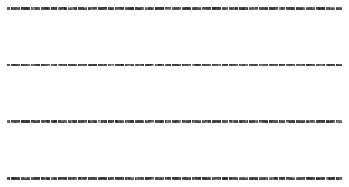

In [ ]:
# example of loading the generator model and generating images
from numpy import asarray
from numpy.random import randn
from numpy.random import randint
from keras.models import load_model
from matplotlib import pyplot

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples, n_classes=4):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	z_input = x_input.reshape(n_samples, latent_dim)
	# generate labels
	labels = randint(0, n_classes, n_samples)
	return [z_input, labels]

# create and save a plot of generated images
def save_plot(examples, n,n2):
	# plot images
	for i in range(n * n2):
		# define subplot
		pyplot.subplot(n, n2, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
	#plt.rcParams['figure.figsize'] = [20, 20]  
	pyplot.show()

# load model
model = load_model('/content/cgan_generator.h5')
# generate images
latent_points, labels = generate_latent_points(100, 800)
# specify labels
labels = asarray([x for _ in range(100) for x in range(8)])
print(labels)
# generate images
X  = model.predict([latent_points, labels])
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the result

save_plot(X, 4,100)

In [ ]:
X=(X*255)

In [ ]:
from PIL import Image#51,32
import numpy as np
from IPython.display import display
for i in range(X.shape[0]):
  print(labels[i])
  PIL_image = Image.fromarray(X[i].reshape(224,224))
  PIL_image = PIL_image.convert("L")
  display(PIL_image)


In [ ]:
from math import floor
from numpy import ones
from numpy import expand_dims
from numpy import log
from numpy import mean
from numpy import std
from numpy import exp
from numpy.random import shuffle
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.datasets import cifar10
from skimage.transform import resize
from numpy import asarray
 
# scale an array of images to a new size
def scale_images(images, new_shape):
	print(images.shape)
	images=np.squeeze(images, axis=(3,))
	images=np.repeat(images[..., np.newaxis], 3, -1)
	print(images.shape) 
	images_list = list()
	for image in images:
		# resize with nearest neighbor interpolation
		new_image = resize(image, new_shape, 0)
		# store
		images_list.append(new_image)
	return asarray(images_list)
 
# assumes images have any shape and pixels in [0,255]
def calculate_inception_score(images, n_split=10, eps=1E-16):
	# load inception v3 model
	model = InceptionV3()
	# enumerate splits of images/predictions
	scores = list()
	n_part = floor(images.shape[0] / n_split)
	for i in range(n_split):
		# retrieve images
		ix_start, ix_end = i * n_part, (i+1) * n_part
		subset = images[ix_start:ix_end]
		# convert from uint8 to float32
		subset = subset.astype('float32')
		# scale images to the required size
		subset = scale_images(subset, (299,299,3))
		# pre-process images, scale to [-1,1]
		subset = preprocess_input(subset)
		# predict p(y|x)
		p_yx = model.predict(subset)
		# calculate p(y)
		p_y = expand_dims(p_yx.mean(axis=0), 0)
		# calculate KL divergence using log probabilities
		kl_d = p_yx * (log(p_yx + eps) - log(p_y + eps))
		# sum over classes
		sum_kl_d = kl_d.sum(axis=1)
		# average over images
		avg_kl_d = mean(sum_kl_d)
		# undo the log
		is_score = exp(avg_kl_d)
		# store
		scores.append(is_score)
	# average across images
	is_avg, is_std = mean(scores), std(scores)
	return is_avg, is_std
 
# load cifar10 images
images=X
# shuffle images
shuffle(images)
print('loaded', images.shape)
# calculate inception score
is_avg, is_std = calculate_inception_score(images)
print('score', is_avg, is_std)

loaded (400, 200, 200, 1)
(40, 200, 200, 1)
(40, 200, 200, 3)
(40, 200, 200, 1)
(40, 200, 200, 3)
(40, 200, 200, 1)
(40, 200, 200, 3)
(40, 200, 200, 1)
(40, 200, 200, 3)
(40, 200, 200, 1)
(40, 200, 200, 3)
(40, 200, 200, 1)
(40, 200, 200, 3)
(40, 200, 200, 1)
(40, 200, 200, 3)
(40, 200, 200, 1)
(40, 200, 200, 3)
(40, 200, 200, 1)
(40, 200, 200, 3)
(40, 200, 200, 1)
(40, 200, 200, 3)
score 1.5369967 0.101828516
